    
# The Taxi Problem
<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/Taxi_in_New_York_City.jpg" alt="Taxi" style="width:70%; border:0;">
</p>
Author: Wouter van Heeswijk

Description from "Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition" by Tom Dietterich ([Github source](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py))

## Description
There are four designated locations in the grid world indicated by R(ed), G(reen), Y(ellow), and B(lue). When the episode starts, the taxi starts off at a random square and the passenger is at a random location. The taxi drives to the passenger's location, picks up the passenger, drives to the passenger's destination (another one of the four specified locations), and then drops off the passenger. Once the passenger is dropped off, the episode ends.

Map:
```
    +---------+,
    |R: | : :G|
    | : | : : |
    | : : : : |
    | | : | : |
    |Y| : |B: |
    +---------+
```
    
## Actions
There are 6 discrete deterministic actions:
- 0: move south
- 1: move north
- 2: move east
- 3: move west
- 4: pickup passenger
- 5: drop off passenger

## Observations
There are 500 discrete states since there are 25 taxi positions, 5 possible locations of the passenger (including the case when the passenger is in the taxi), and 4 destination locations. Note that there are 400 states that can actually be reached during an episode. The missing states correspond to situations in which the passenger is at the same location as their destination, as this typically signals the end of an episode. Four additional states can be observed right after a successful episodes, when both the passenger and the taxi are at the destination. This gives a total of 404 reachable discrete states. Each state space is represented by the tuple: (taxi_row, taxi_col, passenger_location, destination). An observation is an integer that encodes the corresponding state. The state tuple can then be decoded with the "decode" method.

Passenger locations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)
- 4: in taxi

Destinations:
- 0: R(ed)
- 1: G(reen)
- 2: Y(ellow)
- 3: B(lue)

## Info
``step`` and ``reset()`` will return an info dictionary that contains "p" and "action_mask" containing the probability that the state is taken and a mask of what actions will result in a change of state to speed up training.
As Taxi's initial state is a stochastic, the "p" key represents the probability of the
transition however this value is currently bugged being 1.0, this will be fixed soon.
As the steps are deterministic, "p" represents the probability of the transition which is always 1.0
For some cases, taking an action will have no effect on the state of the agent.
In v0.25.0, ``info["action_mask"]`` contains a np.ndarray for each of the action specifying
if the action will change the state.
To sample a modifying action, use ``action = env.action_space.sample(info["action_mask"])``
With a Q-value based algorithm, use ``action = np.argmax(q_values[obs, np.where(info["action_mask"] == 1)[0]])``.

## Rewards
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10  executing "pickup" and "drop-off" actions illegally.


# Sources for this notebook
OpenAI Gym Taxi environment: ([Github source](https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py)) <br>
Q-learning algorithm: [LearningDataSci](https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/)

## Install and import libraries

In [ ]:
"""Install libraries (outcomment commands by removing # and run cell)"""
!pip install cmake 'gym[atari]' scipy pygame

In [ ]:
"""Import libraries"""
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output
from time import sleep
import pygame

## General functions

In [ ]:
def frame_reshape(frame):
  frame = np.squeeze(frame)
  if np.shape(frame)[0]==2:
    frame = frame[0, :,:, 0]
  else:
    frame = frame[:,:, 0]

  return frame

In [ ]:
def run_animation(experience_buffer):
    """Function to run animation"""
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        # Print console output
        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")
        # Pauze animation
        sleep(time_lag)

## Environment initialization

State space: Discrete(500)
Action space: Discrete(6)
State: 351
Action: 2
Action mask: [1 1 0 1 0 0]
Reward: -1


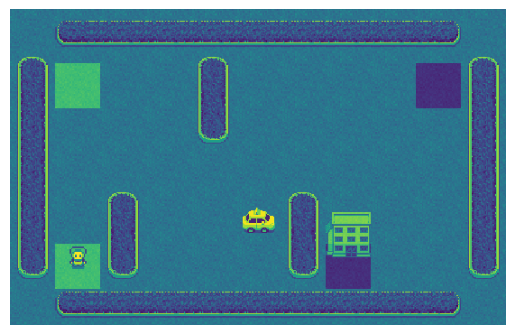

In [ ]:
"""Initialize and validate the environment"""
env = gym.make("Taxi-v3", render_mode="rgb_array").env

state, _ = env.reset()

# Print dimensions of state and action space
print("State space: {}".format(env.observation_space))
print("Action space: {}".format(env.action_space))

# Sample random action
action = env.action_space.sample()
next_state, reward, done, _, _ = env.step(action)

# Print output
print("State: {}".format(state))
print("Action: {}".format(action))
print("Action mask: {}".format(env.action_mask(state)))
print("Reward: {}".format(reward))

# Render and plot an environment frame
frame=env.render()

frame=frame_reshape(frame)


plt.imshow(frame)
plt.axis("off")
plt.show()

# Simulation with random agent

In [ ]:
"""Simulation with random agent"""
epoch = 0
num_failed_dropoffs = 0
experience_buffer = []
cum_reward = 0

done = False

state, _ = env.reset()

while """[INSERT TERMINATION CONDITION HERE]""":
    # Sample random action
    """[SAMPLE RANDOM ACTION]"""
    # Sample random action

    state, reward, done, _, _ = env.step(action)
    cum_reward += reward

    # Store experience in dictionary
    frame = env.render()
    frame = frame_reshape(frame)


    experience_buffer.append({
        "frame": frame,
        "episode": 1,
        "epoch": epoch,
        "state": state,
        "action": action,
        "reward": cum_reward,
        }
    )

    if reward == -10:
        num_failed_dropoffs += 1

    epoch += 1
    env.render()

"""[INSERT COMMAND TO RUN THE ANIMATION]"""


print("# epochs: {}".format(epoch))
print("# failed drop-offs: {}".format(num_failed_dropoffs))

## Training the agent

In [ ]:
%%time

"""Training the agent"""
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
"""[FILL IN HYPERPARAMETER VALUES"""
alpha = None  # Learning rate, weight on new observation
gamma = None  # Discount rate, exponential weight reduction on future rewards
epsilon = None  # Exploration rate, percentage of random actions
num_episodes = None  # Number of episodes, repetitions of task

# Output for plots
cum_rewards = np.zeros([num_episodes])
total_epochs = np.zeros([num_episodes])

for episode in range(1, num_episodes+1):
    # Reset environment
    state, _ = env.reset()
    epoch = 0
    num_failed_dropoffs = 0
    done = False
    cum_reward = 0

    while not done:

        action = """[INSERT ACTION SELECTION MECHANISM HERE]"""

        next_state, reward, done, _ , info = env.step(action)

        cum_reward += reward

        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_q_value = """[INSERT UPDATE RULE HERE]"""

        q_table[state, action] = new_q_value

        if reward == -10:
            num_failed_dropoffs += 1

        state = next_state
        epoch += 1

        total_epochs[episode-1] = epoch
        cum_rewards[episode-1] = cum_reward

    if episode % 1 == 0:
        clear_output(wait=True)
        print(f"Episode #: {episode}")

print("\n")
print("===Training completed.===\n")

# Plot reward convergence
plt.title("Cumulative reward per episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(cum_rewards)
plt.show()

# Plot epoch convergence
plt.title("# epochs per episode")
plt.xlabel("Episode")
plt.ylabel("# epochs")
plt.plot(total_epochs)
plt.show()

## Performance test

In [ ]:
"""Test policy performance after training"""

num_epochs = 0
total_failed_deliveries = 0
num_episodes = 1
experience_buffer = []

for episode in range(1, num_episodes+1):
    # Initialize experience buffer

    state, _ = env.reset()
    epoch = 1
    num_failed_deliveries =0
    cum_reward = 0
    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _, _ = env.step(action)
        cum_reward += reward

        if reward == -10:
            num_failed_deliveries += 1

        # Store rendered frame in animation dictionary
        experience_buffer.append({
            'frame': env.render(),
            'episode': episode,
            'epoch': epoch,
            'state': state,
            'action': action,
            'reward': cum_reward
            }
        )

        epoch += 1

    total_failed_deliveries += num_failed_deliveries
    num_epochs += epoch

# Run animation and print output
run_animation(experience_buffer)

# Print final results
print("\n")
print(f"Test results after {num_episodes} episodes:")
print(f"Mean # epochs per episode: {num_epochs / num_episodes}")
print(f"Mean # failed drop-offs per episode: {total_failed_deliveries / num_episodes}")